# Assignment 1

*by- Shreyaskumar Kathiriya*



## PROBLEM 1
*You are given the closing stock prices of 4 companies for one year. With the help of the
what you are being taught in the first class (basic arithmetic in R) answer the following
questions*

### Preparing the data before analysis:


In [1]:
#reading the file
df = read.csv("C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Assignment1_DATA.csv")

In [2]:
#convert Date from Factor to Date 
colnames(df)[1] = "Date"
df$Date = as.Date(df$Date,format="%d/%m/%Y")

In [3]:
install.packages('dplyr')
library(dplyr)

package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\Wondershare\CreatorTemp\Rtmp0OZYq6\downloaded_packages



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [187]:
#arrange the data by ascending date
df = arrange(df, df$Date)

In [188]:
head(df,5)

Date,AMZN,KMX,GOOG,GE
2017-01-23,817.88,67.13,819.31,29.75
2017-01-24,822.44,68.21,823.87,30.00
2017-01-25,836.52,68.20,835.67,30.37
2017-01-26,839.15,67.67,832.15,30.32
2017-01-27,835.77,67.46,823.31,30.01


### Q 1. Compute the average price of each company’s share for the given year

In [189]:
for (a in 2:5){
    cat("The mean for",colnames(df)[a],"is",mean(df[,a]),"\n")
}

The mean for AMZN is 977.5859 
The mean for KMX is 65.83 
The mean for GOOG is 928.3296 
The mean for GE is 25.67647 


###### Above shown are the mean price for the given stocks

### Q 2. What are the data types of all the variables in the dataset?

In [190]:
str(df)

'data.frame':	238 obs. of  5 variables:
 $ Date: Date, format: "2017-01-23" "2017-01-24" ...
 $ AMZN: num  818 822 837 839 836 ...
 $ KMX : num  67.1 68.2 68.2 67.7 67.5 ...
 $ GOOG: num  819 824 836 832 823 ...
 $ GE  : num  29.8 30 30.4 30.3 30 ...


In [191]:
for(a in 1:5){
  cat("Date type for ",colnames(df[a]),"is",class(df[,a]),"\n")
}


Date type for  Date is Date 
Date type for  AMZN is numeric 
Date type for  KMX is numeric 
Date type for  GOOG is numeric 
Date type for  GE is numeric 


In [192]:
#date are internally stored as double in R
for(a in 1:5){
  cat("Date type for",colnames(df[a]),typeof(df[,a]),"\n")
}

Date type for Date double 
Date type for AMZN double 
Date type for KMX double 
Date type for GOOG double 
Date type for GE double 


### Q3. Calculate the returns for each company’s share for the given year on daily basis.


In [193]:


#return for AMZN

for(a in (1:nrow(df))){
  df$return.AMZN[a] = (df$AMZN[a] -df$AMZN[a-1])/df$AMZN[a-1]
}

#return for KMX

for(a in (1:nrow(df))){
  df$return.KMX[a] = (df$KMX[a] -df$KMX[a-1])/df$KMX[a-1]
}

#return for GOOG

for(a in (1:nrow(df))){
  df$return.GOOG[a] = (df$GOOG[a] -df$GOOG[a-1])/df$GOOG[a-1]
}

#return for GE

for(a in (1:nrow(df))){
  df$return.GE[a] = (df$GE[a] -df$GE[a-1])/df$GE[a-1]
}


In [194]:
#Daily Stock Return 
head(df[,c(1,6:9)],10)

Date,return.AMZN,return.KMX,return.GOOG,return.GE
2017-01-23,NA,NA,NA,NA
2017-01-24,0.005575390,0.0160881871,0.005565659,0.0084033613
2017-01-25,0.017119790,-0.0001466061,0.014322648,0.0123333333
2017-01-26,0.003143977,-0.0077712610,-0.004212189,-0.0016463615
2017-01-27,-0.004027885,-0.0031032954,-0.010623085,-0.0102242744
2017-01-30,-0.006449143,-0.0084494515,-0.025494650,-0.0016661113
2017-01-31,-0.008309449,-0.0026909852,-0.006892512,-0.0086782377
2017-02-01,0.010771361,-0.0227851896,-0.001374264,-0.0003367003
2017-02-02,0.009130774,-0.0029145574,0.003562923,-0.0003368137
2017-02-03,-0.035418775,0.0106153846,0.003706811,0.0006738544


#### *above sliced data frame is return for the stocks*

### Q 4. Calculate the cumulative returns for each company’s share for the given year.
`

In [197]:

for(a in 2:5){
  cat("The Total return for",colnames(df[a]),"over year is:",(df[,a][nrow(df)]- df[,a][2]),"$","\n")
}


The Total return for AMZN over year is: 347.03 $ 
The Total return for KMX over year is: -4.08 $ 
The Total return for GOOG over year is: 222.53 $ 
The Total return for GE over year is: -12.55 $ 


In [198]:

#Taking the first NA row off
df_cumulative = df[-1,]

#Running cumsum function over the return columns to get their cumulative returns 
df_cumulative$CUM.AMZN = cumsum(df_cumulative$return.AMZN)
df_cumulative$CUM.KMX = cumsum(df_cumulative$return.KMX)
df_cumulative$CUM.GOOG = cumsum(df_cumulative$return.GOOG)
df_cumulative$CUM.GE = cumsum(df_cumulative$return.GE)

print("Top 20 rows of the Dataset")
head(df_cumulative,10)[,10:13]
print("bottom 20 rows of Dataset")
tail(df_cumulative,10)[,10:13]

[1] "Top 20 rows of the Dataset"


,CUM.AMZN,CUM.KMX,CUM.GOOG,CUM.GE
2,0.005575390,0.016088187,0.005565659,0.008403361
3,0.022695180,0.015941581,0.019888307,0.020736695
4,0.025839157,0.008170320,0.015676118,0.019090333
5,0.021811272,0.005067025,0.005053033,0.008866059
6,0.015362129,-0.003382427,-0.020441617,0.007199947
7,0.007052681,-0.006073412,-0.027334128,-0.001478290
8,0.017824041,-0.028858602,-0.028708393,-0.001814991
9,0.026954815,-0.031773159,-0.025145470,-0.002151804
10,-0.008463959,-0.021157775,-0.021438658,-0.001477950
11,-0.011623673,-0.029987125,-0.021625810,-0.002824751


[1] "bottom 20 rows of Dataset"


,CUM.AMZN,CUM.KMX,CUM.GOOG,CUM.GE
229,0.3861410,0.033933258,0.2728649,-0.4928024
230,0.3958430,0.045597217,0.2850338,-0.4961694
231,0.3931552,0.035819050,0.2790365,-0.5057414
232,0.3849355,0.044956854,0.2736847,-0.5137005
233,0.3825068,0.008882661,0.2724452,-0.5125544
234,0.3770589,-0.002784005,0.2691452,-0.5108371
235,0.3842485,0.002121713,0.2659569,-0.5148371
236,0.3889223,-0.007641826,0.2589826,-0.5177058
237,0.3921703,-0.009182421,0.2578105,-0.5188565
238,0.3781496,-0.019674629,0.2561504,-0.5136722


#### Above is date frame of cumulative return of each stock 

### Q 5. Find out the top 5 top returns for the given year.


In [199]:
#problem 1.5
print("TOP 5 RETURN OF THE STOCKS")
tail(df[order(df$return.AMZN,na.last = F),],5)[,c("Date","return.AMZN")]

tail(df[order(df$return.KMX,na.last = F),],5)[,c("Date","return.KMX")]

tail(df[order(df$return.GOOG,na.last = F),],5)[,c("Date","return.GOOG")]

tail(df[order(df$return.GE,na.last = F),],5)[,c("Date","return.GE")]


[1] "TOP 5 RETURN OF THE STOCKS"


,Date,return.AMZN
47,2017-03-29,0.02140187
102,2017-06-16,0.02441478
69,2017-05-01,0.02512460
214,2017-11-24,0.02580958
195,2017-10-27,0.13216375


,Date,return.KMX
220,2017-12-04,0.03407429
154,2017-08-30,0.03823159
106,2017-06-22,0.04620020
82,2017-05-18,0.06147951
170,2017-09-22,0.07771644


,Date,return.GOOG
148,2017-08-22,0.01988618
173,2017-09-27,0.02122483
64,2017-04-24,0.02320948
68,2017-04-28,0.03627109
195,2017-10-27,0.04802789


,Date,return.GE
34,2017-03-10,0.02090357
166,2017-09-18,0.02214793
156,2017-09-01,0.02403259
205,2017-11-10,0.02501251
98,2017-06-12,0.03579098


##### Above are the top 5 returns of the stocks with their date of occurance.

### Q 6. Find out the top 5 worst returns for the given year

In [200]:
#problem 1.6
print("WORST 5 RETURN OF THE STOCKS")
head(df[order(df$return.AMZN,na.last = F),],6)[,c("Date","return.AMZN")]

head(df[order(df$return.KMX,na.last = F),],6)[,c("Date","return.KMX")]

head(df[order(df$return.GOOG,na.last = F),],6)[,c("Date","return.GOOG")]

head(df[order(df$return.GE,na.last = F),],6)[,c("Date","return.GE")]


[1] "WORST 5 RETURN OF THE STOCKS"


,Date,return.AMZN
1,2017-01-23,NA
10,2017-02-03,-0.03541877
97,2017-06-09,-0.03163511
132,2017-07-31,-0.03162621
217,2017-11-29,-0.02708613
140,2017-08-10,-0.02554964


,Date,return.KMX
1,2017-01-23,NA
50,2017-04-03,-0.04305978
221,2017-12-05,-0.04228539
104,2017-06-20,-0.03876723
233,2017-12-21,-0.03607419
39,2017-03-17,-0.02911552


,Date,return.GOOG
1,2017-01-23,NA
97,2017-06-09,-0.03414649
128,2017-07-25,-0.03023441
109,2017-06-27,-0.02619005
6,2017-01-30,-0.02549465
81,2017-05-17,-0.02479321


,Date,return.GE
1,2017-01-23,NA
206,2017-11-13,-0.07174231
191,2017-10-23,-0.06336551
207,2017-11-14,-0.05888538
181,2017-10-09,-0.03936039
115,2017-07-06,-0.03802559


##### Above are the worst 5 returns of the stocks with their date of occurance.

### Q 7. Using the function plot(), try to visualize the returns of the stock over one year


Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1 rows containing missing values (geom_path)."Warning message:
"Removed 1 rows containing missing values (geom_point)."

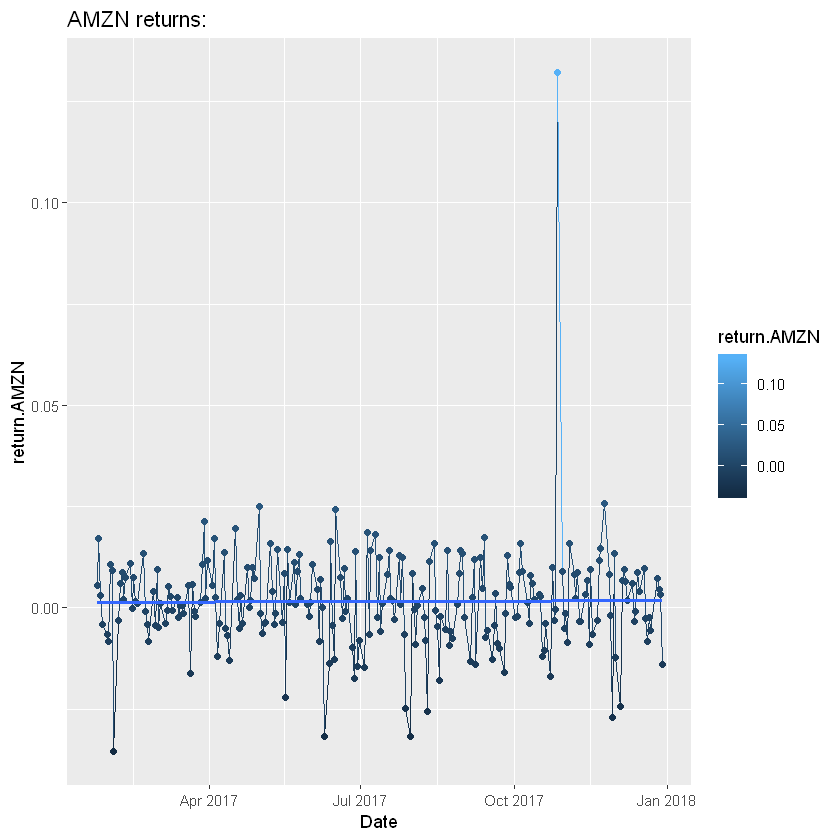

In [205]:
#plot the returnplot
library(ggplot2)
ggplot(data = df, aes(x=Date,y =return.AMZN, color= return.AMZN))+geom_line()+geom_point()+ ggtitle("AMZN returns:")+ geom_smooth(method="lm",se=F)


#### *Above is the line graph for AMZN return*

Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1 rows containing missing values (geom_path)."Warning message:
"Removed 1 rows containing missing values (geom_point)."

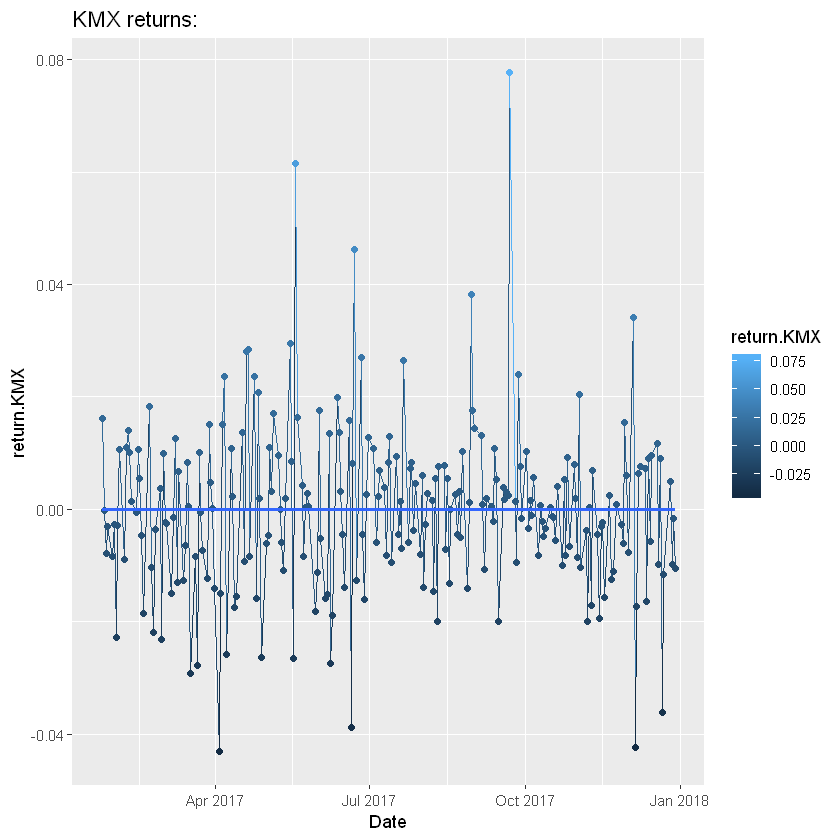

In [206]:
ggplot(data = df, aes(x=Date,y =return.KMX, color = return.KMX))+geom_line()+ geom_point()+ ggtitle("KMX returns:")+ geom_smooth(method="lm",se=F)


#### *Above is the line graph for KMX return*

Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1 rows containing missing values (geom_path)."Warning message:
"Removed 1 rows containing missing values (geom_point)."

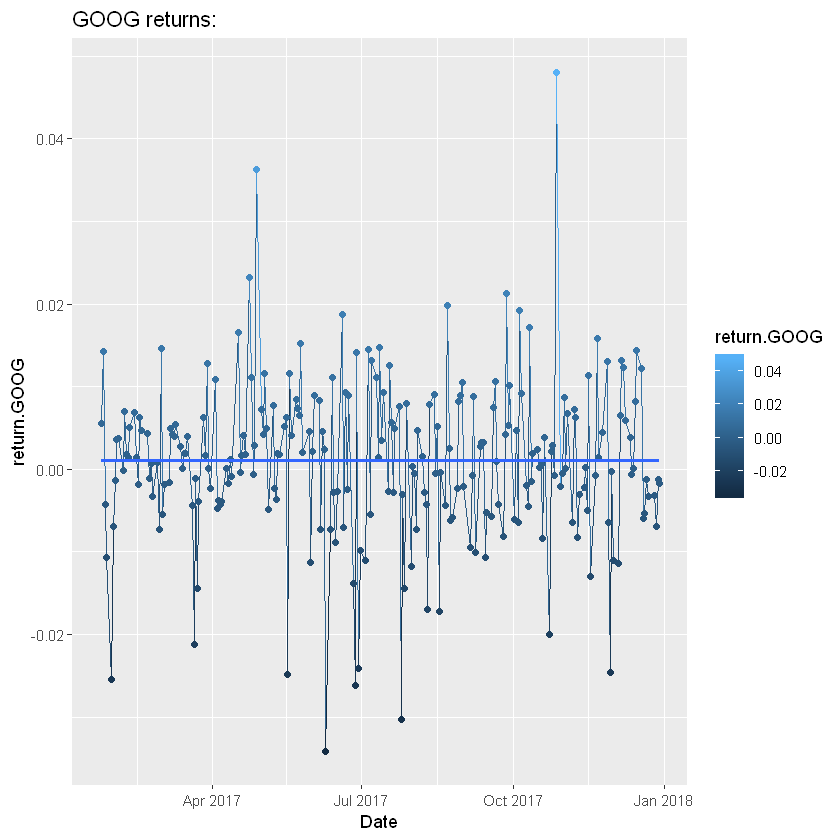

In [207]:
ggplot(data = df, aes(x=Date,y =return.GOOG, color = return.GOOG))+geom_line()+ geom_point()+ ggtitle("GOOG returns:")+ geom_smooth(method="lm",se=F)


#### *Above is the line graph for GOOG return*

Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1 rows containing missing values (geom_path)."Warning message:
"Removed 1 rows containing missing values (geom_point)."

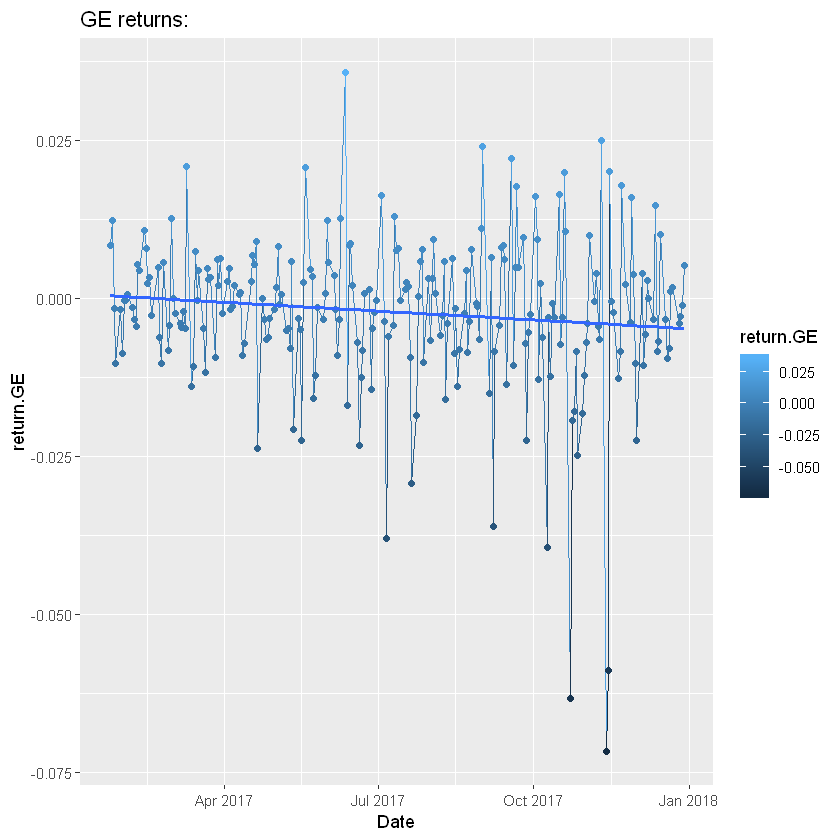

In [208]:

ggplot(data = df, aes(x=Date,y =return.GE, color= return.GE))+geom_line()+ geom_point()+ ggtitle("GE returns:")+ geom_smooth(method="lm",se=F)

#### *Above is the line graph for GE return*

Date,AMZN,KMX,GOOG,GE,return.AMZN,return.KMX,return.GOOG,return.GE
2017-01-23,817.88,67.13,819.31,29.75,NA,NA,NA,NA
2017-01-24,822.44,68.21,823.87,30.00,0.005575390,0.0160881871,0.005565659,0.008403361
2017-01-25,836.52,68.20,835.67,30.37,0.017119790,-0.0001466061,0.014322648,0.012333333
2017-01-26,839.15,67.67,832.15,30.32,0.003143977,-0.0077712610,-0.004212189,-0.001646362
2017-01-27,835.77,67.46,823.31,30.01,-0.004027885,-0.0031032954,-0.010623085,-0.010224274
2017-01-30,830.38,66.89,802.32,29.96,-0.006449143,-0.0084494515,-0.025494650,-0.001666111


`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 4 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 4 rows containing missing values (geom_path)."

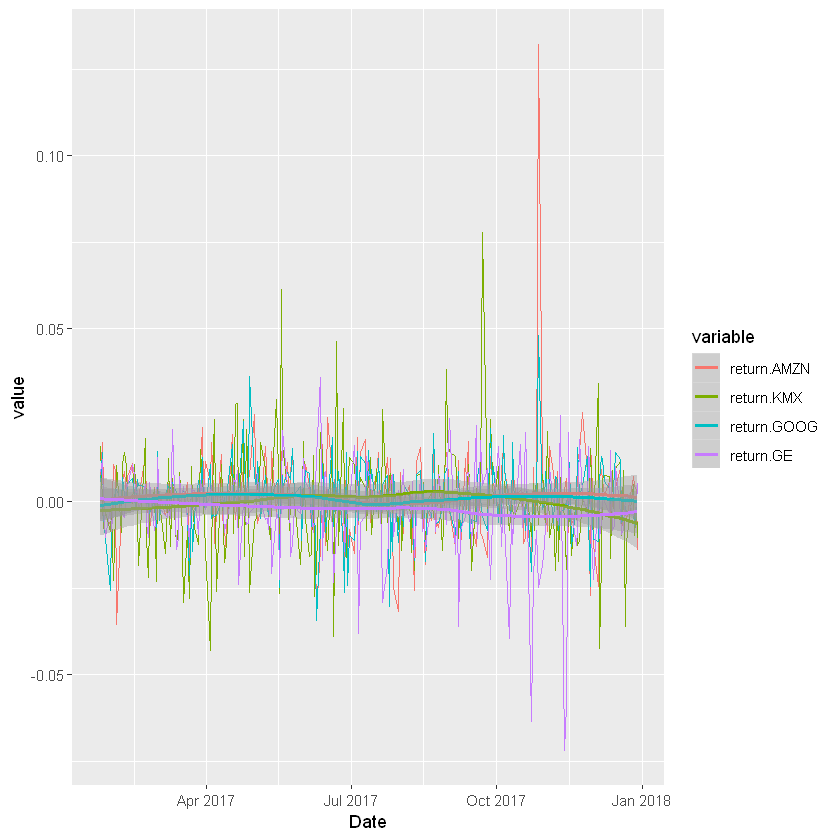

In [209]:
#to plot the stocks together we stacked them in a column using melt function

library(reshape2)
d <- melt(df, id=c("Date","AMZN","KMX","GOOG","GE"))
head(df)
# Everything on the same plot
ggplot(d, aes(Date,value, color=variable)) + 
  geom_line() + geom_smooth()

#### *The above graph compares return of all the stocks*

## Problem 2
### Using the Cheesemakers dataset, answer the following questions:


### Preparing Data for the analysis :

In [210]:
df = read.csv("C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Assignment1.1.csv")

In [211]:
#convert Date from Factor to Date 
colnames(df["Date"]) = "Date"
df$Date = as.Date(df$Date,format="%d/%m/%Y")

### Q 1. Compute the summary statistics for gross profit in cheese? What does this mean to you?


##### Summary of the data helps in understanding the data before its analysis. 
1. It tells us the data type of the attributes we have in the dataset
2. Structure of the data gives statistical information like mean, median, max etc to understand the numerical variables.

In [212]:
#problem 2.1

#understanding Data
head(df,1)
tail(df,1)


Contact.method,Customer.ID,Date,Item.ID,Item.name,Order.ID,Row.ID,State,Gross.profit,Number.of.Records,Sale.amount,Sales.target
Both,18565,2012-01-01,1,Calistoga Cheddar,106,1,CA,8,1,18,22


,Contact.method,Customer.ID,Date,Item.ID,Item.name,Order.ID,Row.ID,State,Gross.profit,Number.of.Records,Sale.amount,Sales.target
94547,Neither,38206,NA,7,Mill Valley Goat,77838,2,WY,9,1,18,6


In [214]:
print("Structure of the Data")
str(df)

[1] "Structure of the Data"
'data.frame':	94547 obs. of  12 variables:
 $ Contact.method   : Factor w/ 4 levels "Both","Email",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Customer.ID      : int  18565 22873 38254 46726 41695 18348 4985 16630 45494 46847 ...
 $ Date             : Date, format: "2012-01-01" "2012-01-01" ...
 $ Item.ID          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Item.name        : Factor w/ 7 levels "Calistoga Cheddar",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Order.ID         : int  106 145 179 207 188 102 29 92 202 208 ...
 $ Row.ID           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ State            : Factor w/ 49 levels "AL","AR","AZ",..: 4 4 4 6 7 9 11 13 17 21 ...
 $ Gross.profit     : int  8 10 10 8 21 10 10 10 18 50 ...
 $ Number.of.Records: int  1 1 1 1 1 1 1 1 1 1 ...
 $ Sale.amount      : int  18 24 24 18 48 24 24 24 43 117 ...
 $ Sales.target     : int  22 22 22 22 67 22 22 22 44 156 ...


#### Above structure tells us about the columns which are integers or factors 

In [215]:
print("Summary of the Data")
summary(df)

[1] "Summary of the Data"


    Contact.method   Customer.ID         Date               Item.ID     
 Both      :26565   Min.   :    1   Min.   :2012-01-01   Min.   :1.000  
 Email     : 2153   1st Qu.:21925   1st Qu.:2012-07-05   1st Qu.:1.000  
 Neither   :57856   Median :33357   Median :2013-01-12   Median :4.000  
 Newsletter: 7973   Mean   :30747   Mean   :2013-01-05   Mean   :3.622  
                    3rd Qu.:42255   3rd Qu.:2013-07-08   3rd Qu.:6.000  
                    Max.   :47911   Max.   :2013-12-12   Max.   :7.000  
                                    NA's   :55828                       
             Item.name        Order.ID         Row.ID          State      
 Calistoga Cheddar:29841   Min.   :    1   Min.   :1.000   TX     :11173  
 Mill Valley Goat :15406   1st Qu.:22427   1st Qu.:1.000   CA     :10513  
 Napa Cracker     :10759   Median :43247   Median :1.000   FL     : 7057  
 Petaluma Pear    :10800   Mean   :41741   Mean   :1.185   VA     : 4549  
 Reyes Raspberry  : 4631   3rd Qu.:61584 

#### Summary of the dataset tells us about the MIN, Median, Max and other statistical measures that helps us understand the spread of the attributes

### More Analysis on Gross Profit:

In [216]:
#overall Gross profit
cat("Overall Gross Profit for the given data for cheese is:",sum(df[,"Gross.profit"]))

Overall Gross Profit for the given data for cheese is: 2126227

In [217]:
# Highest gross profit by Item name(Grouping the dataset by cheese type)
GP_Item.Name= aggregate(df$Gross.profit, by = list(df$Item.name),FUN = sum)
GP_Item.Name

Group.1,x
Calistoga Cheddar,771592
Mill Valley Goat,390360
Napa Cracker,201773
Petaluma Pear,208019
Reyes Raspberry,26378
Santa Rosa Spread,337353
Sonoma Stilton,190752


#### insight: highest Gross profit was with calistoga cheddar and lowest was by Reyes Raspberry.

In [218]:

GP_sale.Amount= aggregate(df$Sale.amount, by = list(df$Item.name),FUN = sum)

print("x here is the quantity or unit of the item sold")
GP_sale.Amount
print("Highest unit sold was of Calistoga Cheddar ")

GP_sale.Amount$GP_per.count = GP_Item.Name[,2]/GP_sale.Amount[,2]

GP_sale.Amount
print("Though highest unit sold was of Calistoga Cheddar the most Gross Profit per item was of Mill Valley Goat")

[1] "x here is the quantity or unit of the item sold"


Group.1,x
Calistoga Cheddar,1809205
Mill Valley Goat,816806
Napa Cracker,674440
Petaluma Pear,632693
Reyes Raspberry,77707
Santa Rosa Spread,1095820
Sonoma Stilton,676690


[1] "Highest unit sold was of Calistoga Cheddar "


Group.1,x,GP_per.count
Calistoga Cheddar,1809205,0.4264812
Mill Valley Goat,816806,0.4779103
Napa Cracker,674440,0.2991712
Petaluma Pear,632693,0.3287835
Reyes Raspberry,77707,0.3394546
Santa Rosa Spread,1095820,0.3078544
Sonoma Stilton,676690,0.2818898


[1] "Though highest unit sold was of Calistoga Cheddar the most Gross Profit per item was of Mill Valley Goat"


### Above is the Highest Gross profit per item (grouped the dataset by item.name to count total number of each item sold and then divided by the gross profit to get Gross profit per item)
#### Insights:
1. *Highest unit sold was of Calistoga Cheddar*
2. *Though highest unit sold was of Calistoga Cheddar the most Gross Profit per item was of Mill Valley Goat*



[1] "The Record Highest Gross Profit was seen between 2012-01 to 2012-07"


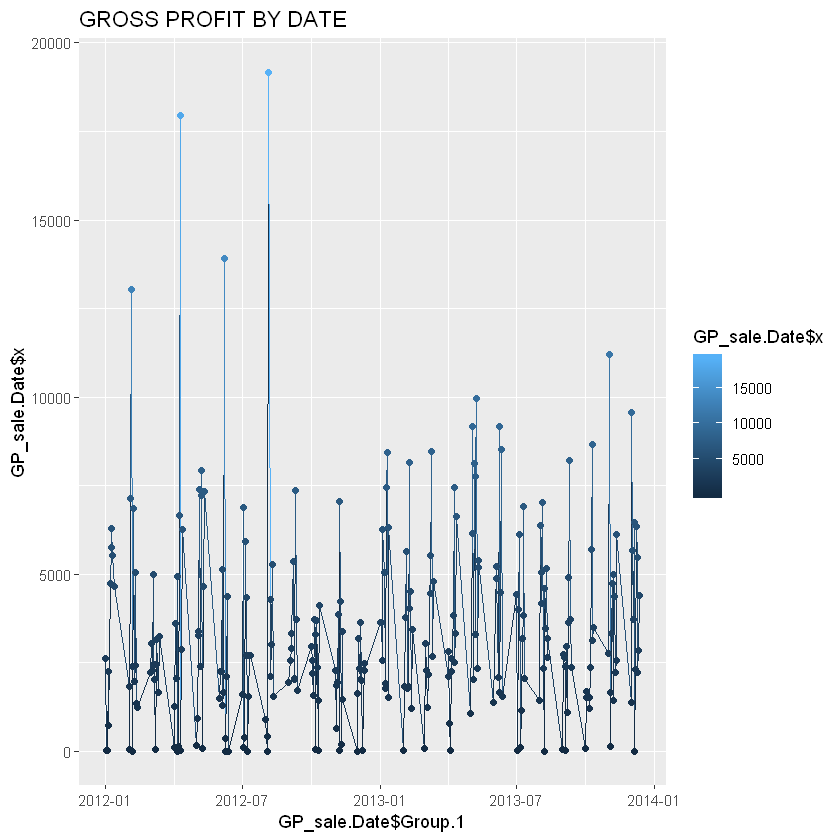

In [220]:
# the Gross Profit per item for Mill Valley Goat is higher than calistoga Cheddar, Even though the sols quantity for Calistoga Cheddar is high.

library(ggplot2)
# Highest Gross profit by date 
GP_sale.Date= aggregate(df$Gross.profit, by = list(df$Date),FUN = sum)

ggplot(data= GP_sale.Date , aes(x=GP_sale.Date$Group.1 , y=GP_sale.Date$x, color = GP_sale.Date$x)) + geom_line() + geom_point()+ggtitle("GROSS PROFIT BY DATE")

print("The Record Highest Gross Profit was seen between 2012-01 to 2012-07")

#### Insights from the above plot: The Record Highest Gross Profit was seen between 2012-01 to 2012-07.

### Q 2. Plot a histogram and a box plot of gross profits. Explain them in English? What do you see? What is normal/abnormal?

#### Solution:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


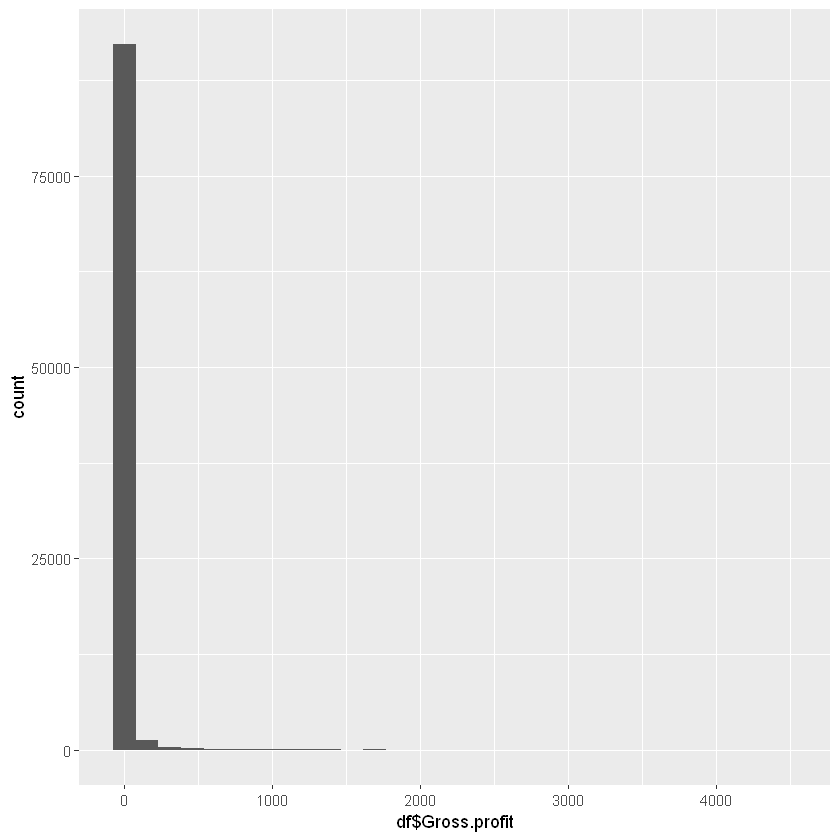

In [39]:
ggplot(data=df) + geom_histogram(aes(x=df$Gross.profit))

#### The above histogram built on the Gross profit takes gross profit values as factors and gives the count of it.
_Well!! Not very useful_

Group.1,x
Calistoga Cheddar,771592
Mill Valley Goat,390360
Napa Cracker,201773
Petaluma Pear,208019
Reyes Raspberry,26378
Santa Rosa Spread,337353
Sonoma Stilton,190752


[1] "Highest Gross Profit is seen with Calistoga cheddar and lowest seen with Reyees Raspberry"


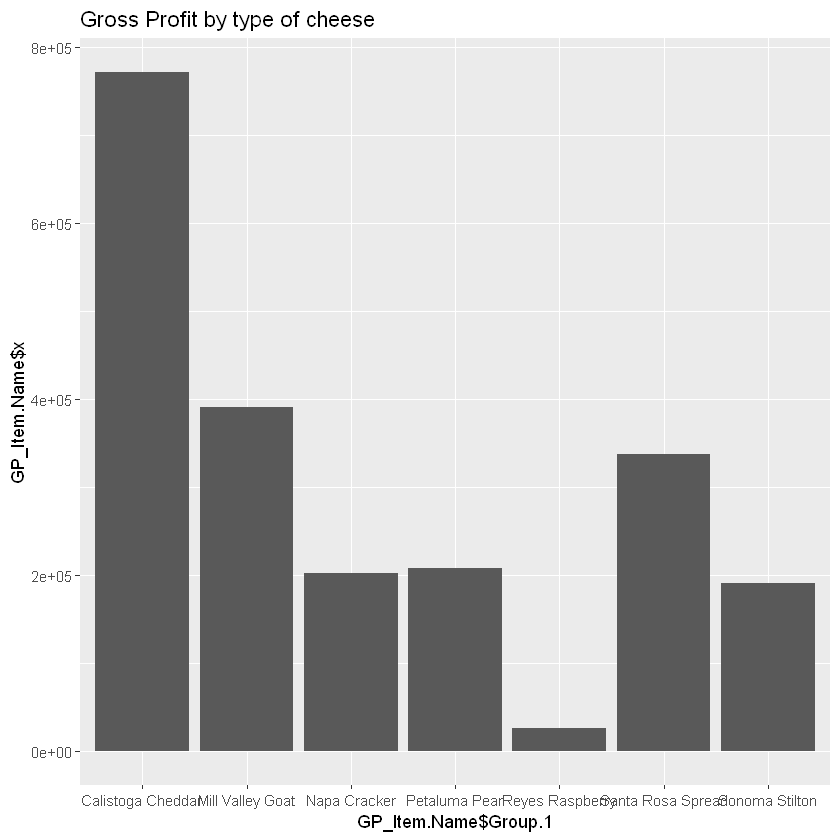

In [221]:
#Problem 2.1
GP_Item.Name
ggplot(data=GP_Item.Name, aes(x=GP_Item.Name$Group.1,y=GP_Item.Name$x))+geom_bar(stat = "identity")+ggtitle("Gross Profit by type of cheese")

print("Highest Gross Profit is seen with Calistoga cheddar and lowest seen with Reyees Raspberry")

#### The above Histograms shows the spread of Gross Profit with respect to Cheese type.
1. *Highest Gross Profit is seen with Calistoga cheddar and lowest seen with Reyees Raspberry*

In [222]:
df_groupby_date.Category = aggregate(df$Gross.profit, by = list(df$Item.name,df$Date),FUN = sum)
head(df_groupby_date.Category,5)

Group.1,Group.2,x
Calistoga Cheddar,2012-01-01,810
Mill Valley Goat,2012-01-01,608
Napa Cracker,2012-01-01,165
Petaluma Pear,2012-01-01,74
Reyes Raspberry,2012-01-01,86


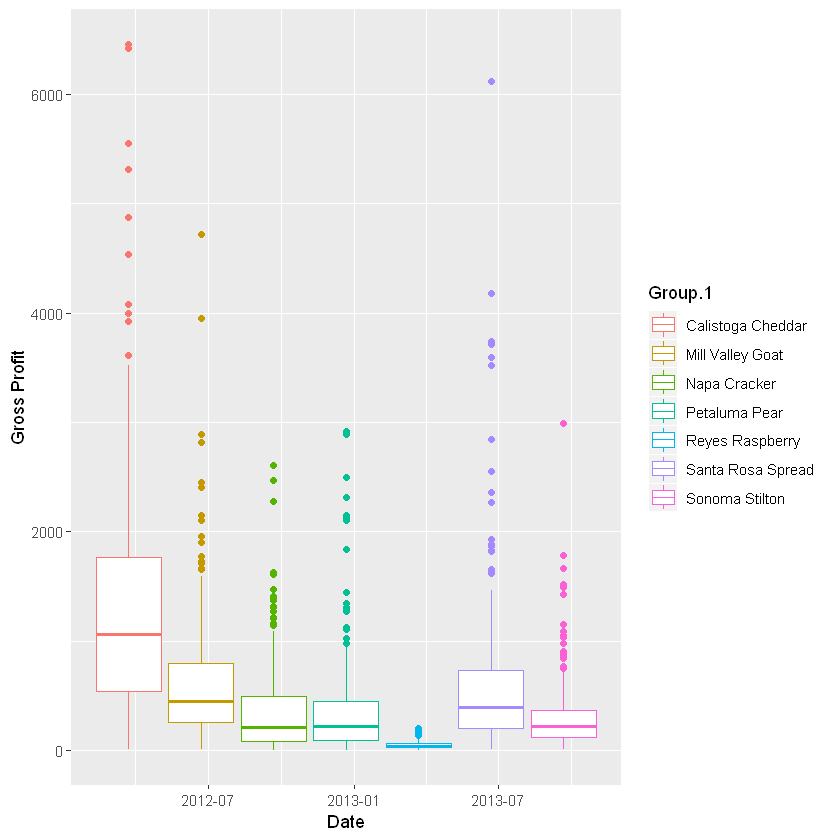

In [223]:
ggplot(data=df_groupby_date.Category)+geom_boxplot(aes(x=Group.2,y=x, color=Group.1))+ylab("Gross Profit")+xlab("Date")

#### *The above barplot was made grouping the dataset with item,name first and then date.* 

### Boxplot to understand the spread of the Gross profit wrt the category of the cheese:

Warning message:
"Removed 1829 rows containing non-finite values (stat_boxplot)."

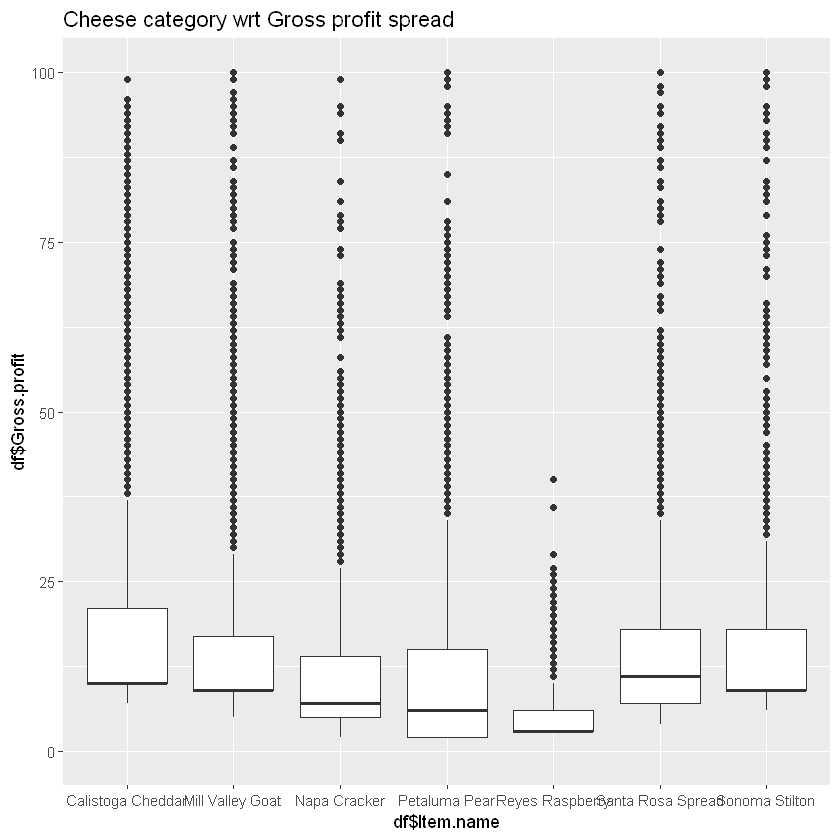

In [224]:
ggplot(data= df)+ geom_boxplot(aes(x = df$Item.name, y= df$Gross.profit))+ylim(0,100)+ggtitle("Cheese category wrt Gross profit spread ")

#### Since the range of gross profit is huge we were having massive single outlier. We discarded the gross profit below 100 to get a better picture of the boxplot.

* INSIGHTS:* 
- The Calistoga Chedda has the highest upper quartile which tells that most of Calistoga Chedda in the population of Orders had high Gross profit compared to other Cheese.
- Petaluma Pear has the lowest Lower quartile; Which tells that most of its order had low gross profit compared to the other Cheese
- Rosa spread has the median line almost in the middle which tells that most of the population had the gross profit close to mean and they were almost equally distributed.
- Reyes Raspberry has a smaller box plot which tells that the orders did not have wide spread Gross profit.
- The Box plot with mean touching the lower quartile had most of the gross profit lying in lower quartile.

*Abnormal: When plotting the box plot with the spread of the Gross profit we can see that a tiny population of order entries have very high gross profit while most of the population lie much lower in the Gross Profit spread.This makes the graph heavily skewed due to the outliers*

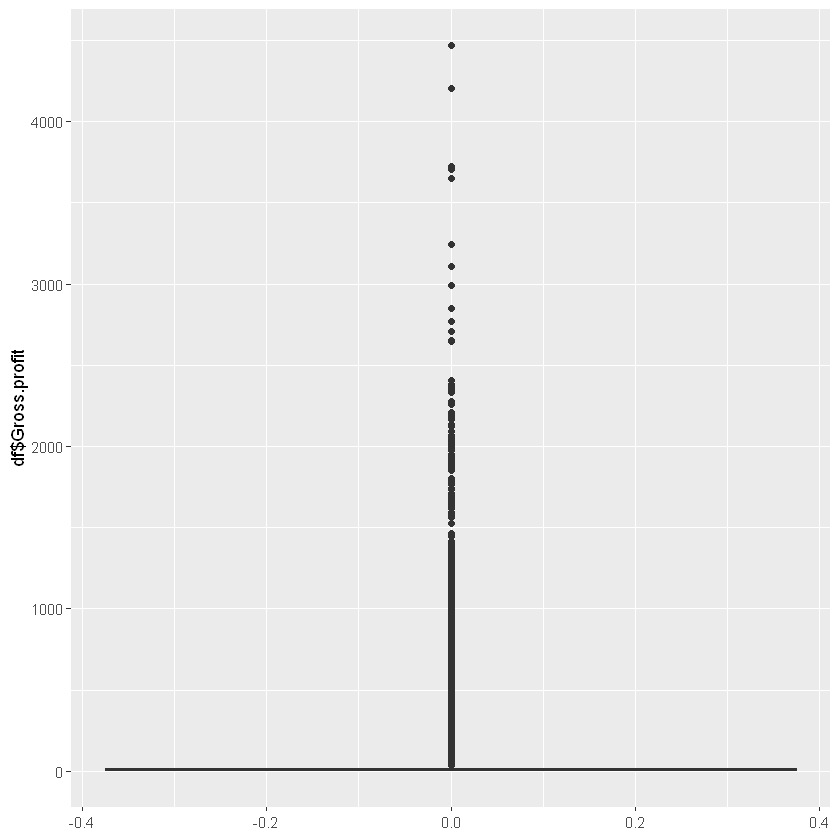

In [227]:
ggplot(data= df)+ geom_boxplot(aes(y= df$Gross.profit))

#### Concluding the above hypothesis
*When plotting the box plot with the spread of the Gross profit we can see that a tiny population of order entries have very high gross profit while most of the population lie much lower in the Gross Profit spread. The plot could be skewed on the basis of the certain gross profit going as high as 5000 while most of the population being between 0 to 100.*

### Q 3. Using the CustomerID column, identify the number of customer who have done recurring purchases.
1. What is the average number of purchases of the recurring clients?
2. What is the average spent by recurring clients?
3. What is the variance in gross profits between recurring clients vs clients who buy 1 cheese?


### 1. What is the average number of purchases of the recurring clients?

#### Solution 1:

In [228]:
df_count_order_per_customer= aggregate(x= df$Number.of.Records,by = list(df$Customer.ID),FUN=sum)

In [229]:
df_recurring_MoreThan1 = df_count_order_per_customer %>% filter(x >= 1)
df_NO_recurring = df_count_order_per_customer %>% filter(x == 1)

In [230]:
cat("The mean average number of purchase recurring clients is :",mean(df_recurring_MoreThan1[,2]))

The mean average number of purchase recurring clients is : 1.996221

### 2. What is the average spent by recurring clients?

#### Solution 2:

In [231]:
df_recurring_Average = df %>% group_by(df$Customer.ID) %>% 
summarise(n = n(),total_revenue = sum(Gross.profit), Average = total_revenue/n) %>% 
filter(n > 1)

In [232]:
head(df_recurring_Average,10)

df$Customer.ID,n,total_revenue,Average
1,4,1370,342.500000
2,7,135,19.285714
3,4,58,14.500000
4,4,71,17.750000
5,5,75,15.000000
6,2,58,29.000000
7,2,45,22.500000
14050,2,29,14.500000
14051,3,20,6.666667
14052,2,24,12.000000


### In the above data n is the count of order with the unique Customer id, and Average is for the Average spent of each ID

### 3. What is the variance in gross profits between recurring clients vs clients who buy 1 cheese?


#### Solution 3:

In [247]:
cat("The variance for client with more than 1 purchse is:",var(df_recurring_MoreThan1[,1]),"\n")
cat("The variance for clients that bought item once is",var(df_NO_recurring[,1]))

The variance for client with more than 1 purchse is: 191233167 
The variance for clients that bought item once is 91212039

#### The variance for client with more than 1 purchse is 191233167.14 and for clients that bought is once is 91212039

### 4. Which are the most profitable clients?

#### Solution 4:

In [248]:
tail(df_recurring_Average[order(df_recurring_Average$Average, na.last = F),],10)

df$Customer.ID,n,total_revenue,Average
47877,4,5913,1478.250
47851,2,3069,1534.500
47910,9,14379,1597.667
47842,2,3551,1775.500
47876,3,5331,1777.000
47857,3,5755,1918.333
47903,4,7774,1943.500
47887,4,8184,2046.000
47890,3,6202,2067.333
47891,3,6793,2264.333


#### The client with high Average Gross Profit would be the most profitable clients to the company.
##### *Listed above are the top 10 client with highest average Gross profit*

### Q 5. How many clients are paying more than 2 standard deviations of the mean price? What does that mean in english?

#### Solution 5:


In [249]:
cat("Standard Deviation for Gross.profit is: ",sd(df[,"Gross.profit"]))

Standard Deviation for Gross.profit is:  92.86595

In [250]:
Two_STD = mean(df[,"Gross.profit"])+(2*sd(df[,"Gross.profit"]))
cat(" 2 Standard Deviation above mean for Gross.profit is: ", Two_STD)

 2 Standard Deviation above mean for Gross.profit is:  208.2205

In [251]:
#grouped the data by customer ID and Summed theie Gross Profit and filtered the one with mean above 2 STD 

df_Above_2STD = df %>% group_by(df$Customer.ID) %>% 
summarise(n = n(),total_revenue = sum(Gross.profit), Average = total_revenue/n) %>%
filter(total_revenue >= Two_STD)

In [252]:
head(df_Above_2STD,5)
cat("number of clients paying more than 2 STD of the mean price :",as.integer(count(df_Above_2STD)))

df$Customer.ID,n,total_revenue,Average
1,4,1370,342.50
45358,4,217,54.25
45437,2,210,105.00
45743,6,231,38.50
45783,1,263,263.00


number of clients paying more than 2 STD of the mean price : 882

#### Above mentioned is the number of clients whoes Total Gross revenue is 2 Standard deviation above mean
- number of clients paying more than 2 STD of the mean price : 882

### Q 6. Compute number of unique clients per state
1. Normalize the data using min-max scaling
2. Is there an association (correlation) between client volume and sales?

### 1. Normalize the data using min-max scaling
#### Solution:

Rescaling (min-max normalization)
Also known as min-max scaling or min-max normalization, is the simplest method and consists in rescaling the range of features to scale the range in [0, 1] or [−1, 1]. Selecting the target range depends on the nature of the data. The general formula for a min-max of [0, 1] is given as

In [254]:
#Number of Unique clients per state
df_unique_State = df %>% group_by(df$State) %>% 
summarise(n = n(),total_revenue = sum(Gross.profit), Average = total_revenue/n)

In [255]:
head(df_unique_State,10)

df$State,n,total_revenue,Average
AL,1587,26084,16.43604
AR,606,11667,19.25248
AZ,2022,32603,16.12413
CA,10513,184433,17.54333
CO,2153,41390,19.22434
CT,1382,31440,22.74964
DC,835,13803,16.53054
DE,347,6067,17.48415
FL,7057,145930,20.67876
GA,2480,49976,20.15161


#### in the above table x is the count of unique client Id in each State.

In [256]:
#function for Min Max Scaling
normalize <- function(x)
{
    return((x- min(x)) /(max(x)-min(x)))
}

In [171]:
#Normalised total revenue from the above grouped Client with state
tail(normalize(df_unique_State[,"total_revenue"]),20)

,total_revenue
30,0.1983452984
31,0.0763825291
32,0.0797821726
33,0.3549477992
34,0.3352736467
35,0.0837581026
36,0.3378557676
37,0.2903545725
38,0.0000000000
39,0.0694581567


#### Above is the list of normalised Total Revenue

In [263]:
head(normalize(df_unique_State[,c(3,4)]),10)

total_revenue,Average
0.11415901,6.898844e-06
0.05102572,1.923224e-05
0.14270627,5.532970e-06
0.80758295,1.174774e-05
0.18118531,1.910903e-05
0.13761340,3.454662e-05
0.06037945,7.312650e-06
0.02650284,1.148859e-05
0.63897499,2.547806e-05
0.21878414,2.316965e-05


#### Normalised total revenue and Average revenue for the unique ID in states using normalise function 

### 2. Is there an association (correlation) between client volume and sales?
#### Solution:

In [264]:
df_unique_State= df_unique_State[order(df_unique_State$n),]

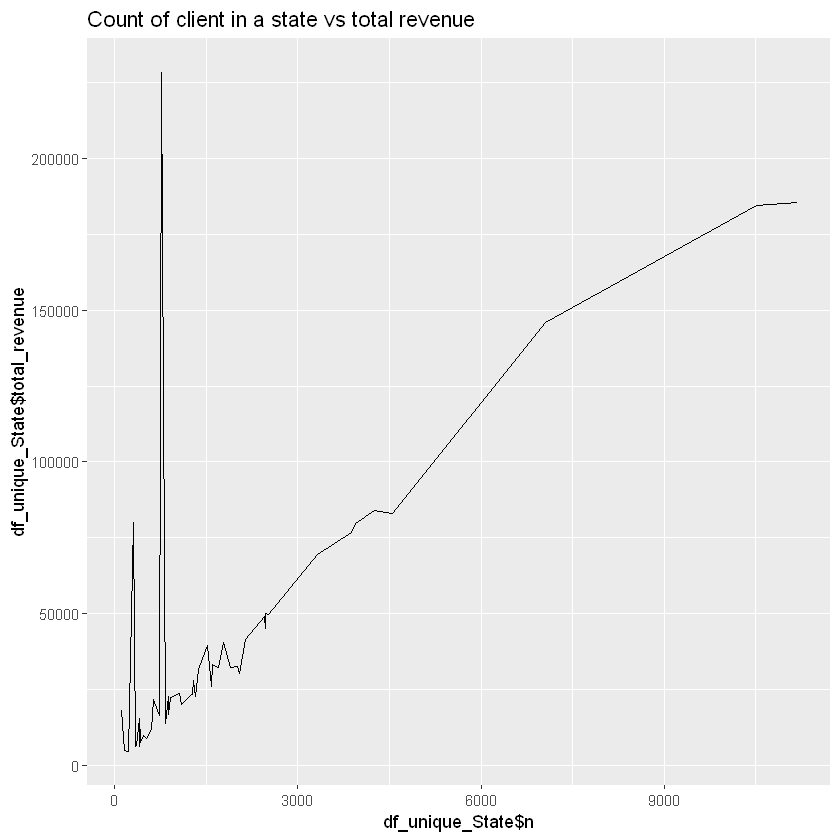

In [265]:
ggplot(data = df_unique_State)+ geom_line(aes(x = df_unique_State$n,y=df_unique_State$total_revenue)) + 
ggtitle("Count of client in a state vs total revenue")

### *Yes, there is somewhat correlation between client volume and sales. From the above data it is clear that with increase in number of unique clients in each states the total revenue increases as well*